In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
#stationID = 'USC00131319' #Cedar Rapids, IA
#stationID = 'USW00003947' #Kansas City, MO 
#stationID = 'USW00093822' #Springfield, IL 

filename = 'Data/merged_dly_tmax_tmin_2012_USW00093822.csv'
df_data = pd.read_csv(filename, index_col=0)

In [18]:
df_data.head()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-01-01,1,48.0,32.0,34.9,12.7,19.3,13.2
2012-01-02,2,32.0,19.0,34.8,12.6,19.2,13.2
2012-01-03,3,34.0,11.0,34.7,12.6,19.1,13.2
2012-01-04,4,48.0,30.0,34.6,12.6,19.0,13.2
2012-01-05,5,59.0,27.0,34.6,12.6,19.0,13.1


In [19]:
df_data.tail()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-12-27,362,31.0,24.0,35.4,12.6,19.9,13.0
2012-12-28,363,34.0,28.0,35.3,12.7,19.8,13.1
2012-12-29,364,31.0,18.0,35.1,12.7,19.7,13.1
2012-12-30,365,42.0,18.0,35.0,12.7,19.6,13.2
2012-12-31,366,36.0,22.0,34.9,12.7,19.4,13.2


In [20]:
#Check for missing data
print(df_data.isna().sum())

Day_of_Year    0
Tmax_dly       0
Tmin_dly       0
Tmax_norm      0
Tmax_std       0
Tmin_norm      0
Tmin_std       0
dtype: int64


In [21]:
start_date = '2012-04-01'
end_date = '2012-11-30'
df_sliced = df_data.loc[start_date:end_date]

In [22]:
df_sliced.head()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-04-01,92,88.0,55.0,59.0,11.9,37.5,9.4
2012-04-02,93,87.0,58.0,59.4,11.8,37.8,9.4
2012-04-03,94,86.0,55.0,59.8,11.8,38.1,9.4
2012-04-04,95,71.0,47.0,60.2,11.7,38.4,9.4
2012-04-05,96,64.0,40.0,60.6,11.7,38.8,9.4


In [23]:
df_sliced.tail()

,Day_of_Year,Tmax_dly,Tmin_dly,Tmax_norm,Tmax_std,Tmin_norm,Tmin_std
DATE,,,,,,,
2012-11-26,331,46.0,27.0,46.5,10.9,29.3,10.0
2012-11-27,332,41.0,18.0,46.0,10.9,28.9,10.1
2012-11-28,333,52.0,24.0,45.4,10.9,28.4,10.1
2012-11-29,334,58.0,34.0,44.9,10.9,28.0,10.2
2012-11-30,335,64.0,42.0,44.3,10.9,27.5,10.2


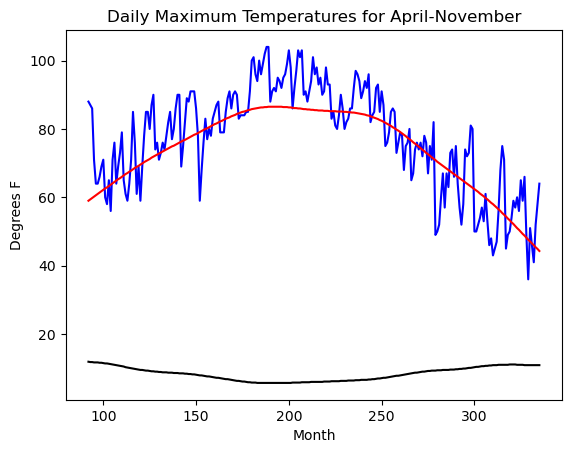

In [24]:
fig, ax = plt.subplots()
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'], c='blue')
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_norm'], c='red')
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_std'], c='black')

#locator = mdates.MonthLocator()
#ax.xaxis.set_major_locator(locator)

#formatter = mdates.DateFormatter('%b')
#ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('Month')
ax.set_ylabel('Degrees F')
ax.set_title('Daily Maximum Temperatures for April-November')


plt.show()

In [25]:
df_sliced['Tmax_zscore'] = (df_sliced['Tmax_dly'] - df_sliced['Tmax_norm']) / df_sliced['Tmax_std']
df_sliced['Tmin_zscore'] = (df_sliced['Tmin_dly'] - df_sliced['Tmin_norm']) / df_sliced['Tmin_std']

/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_49862/3289311066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmax_zscore'] = (df_sliced['Tmax_dly'] - df_sliced['Tmax_norm']) / df_sliced['Tmax_std']
/var/folders/cx/wp0ffkfd3h32cgy6c0r6xtwc0000gn/T/ipykernel_49862/3289311066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced['Tmin_zscore'] = (df_sliced['Tmin_dly'] - df_sliced['Tmin_norm']) / df_sliced['Tmin_std']


In [26]:
Tmax_anomalies = df_sliced[df_sliced['Tmax_zscore'].abs() >= 2]
Tmin_anomalies = df_sliced[df_sliced['Tmin_zscore'].abs() >= 2]

In [ ]:
df_sliced.head()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_zscore'])

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'])
sc = ax.scatter(df_sliced['Day_of_Year'],df_sliced['Tmax_dly'], c=df_sliced['Tmax_zscore'])

fig.colorbar(sc)

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_dly'])
sc = ax.scatter(df_sliced['Day_of_Year'],df_sliced['Tmin_dly'], c=df_sliced['Tmax_zscore'])

fig.colorbar(sc)

plt.show()

In [27]:
print(len(df_sliced['Tmax_dly']))

244


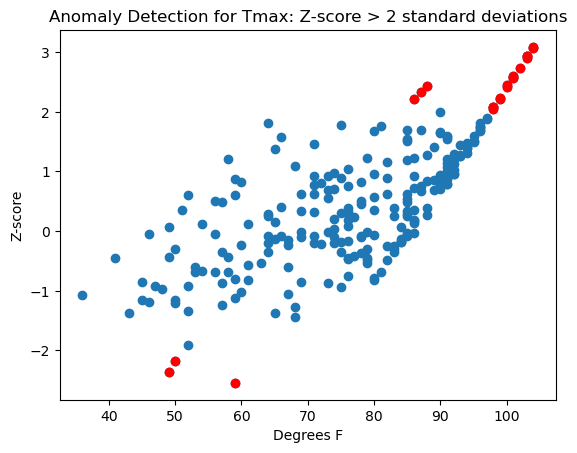

In [35]:
plt.scatter(df_sliced['Tmax_dly'], df_sliced['Tmax_zscore'])
plt.scatter(Tmax_anomalies['Tmax_dly'], Tmax_anomalies['Tmax_zscore'], color='red', label='Anomaly')

plt.xlabel('Degrees F')
plt.ylabel('Z-score')
plt.title('Anomaly Detection for Tmax: Z-score > 2 standard deviations')

plt.show()

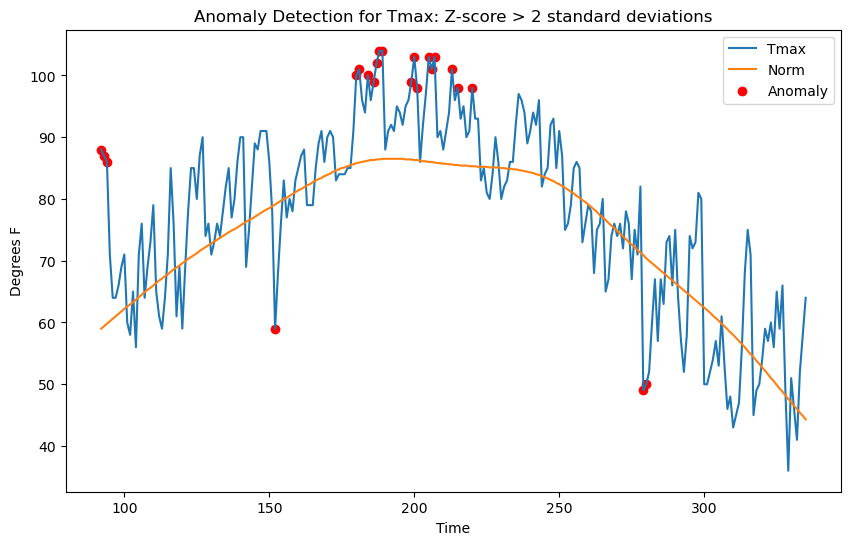

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_dly'], label='Tmax')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmax_norm'], label='Norm')
plt.scatter(Tmax_anomalies['Day_of_Year'], Tmax_anomalies['Tmax_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmax: Z-score > 2 standard deviations')

plt.legend()
plt.show()

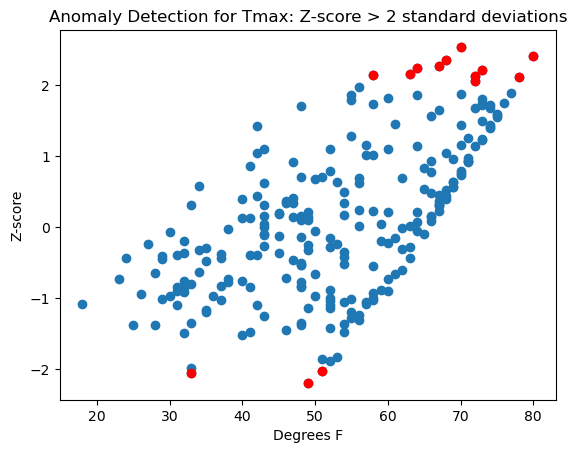

In [36]:
plt.scatter(df_sliced['Tmin_dly'], df_sliced['Tmin_zscore'])
plt.scatter(Tmin_anomalies['Tmin_dly'], Tmin_anomalies['Tmin_zscore'], color='red', label='Anomaly')

plt.xlabel('Degrees F')
plt.ylabel('Z-score')
plt.title('Anomaly Detection for Tmax: Z-score > 2 standard deviations')

plt.show()

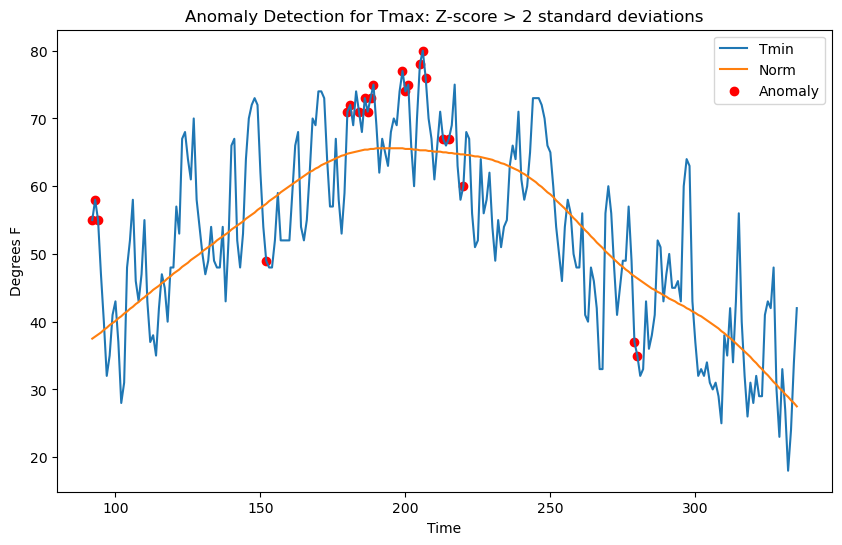

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_dly'], label='Tmin')
plt.plot(df_sliced['Day_of_Year'], df_sliced['Tmin_norm'], label='Norm')
plt.scatter(Tmax_anomalies['Day_of_Year'], Tmax_anomalies['Tmin_dly'], color='red', label='Anomaly')

plt.xlabel('Time')
plt.ylabel('Degrees F')
plt.title('Anomaly Detection for Tmax: Z-score > 2 standard deviations')

plt.legend()
plt.show()